In [2]:
library(tidyverse)
library(topGO)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘topGO’ was built under R version 4.2.2”
Loading

In [3]:
install.packages("palmerpenguins")
library(palmerpenguins)
install.packages("ggthemes")
library(ggthemes)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



1. How many rows are in penguins? How many columns?

In [6]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


There are 344 rows and 8 columns.

2. What does the bill_depth_mm variable in the penguins data frame describe? Read the help for ?penguins to find out.

In [9]:
?penguins

penguins            package:palmerpenguins             R Documentation

_S_i_z_e _m_e_a_s_u_r_e_m_e_n_t_s _f_o_r _a_d_u_l_t _f_o_r_a_g_i_n_g _p_e_n_g_u_i_n_s _n_e_a_r _P_a_l_m_e_r _S_t_a_t_i_o_n,
_A_n_t_a_r_c_t_i_c_a

_D_e_s_c_r_i_p_t_i_o_n:

     Includes measurements for penguin species, island in Palmer
     Archipelago, size (flipper length, body mass, bill dimensions),
     and sex. This is a subset of ‘penguins_raw’.

_U_s_a_g_e:

     penguins
     
_F_o_r_m_a_t:

     A tibble with 344 rows and 8 variables:

     species a factor denoting penguin species (Adélie, Chinstrap and
          Gentoo)

     island a factor denoting island in Palmer Archipelago, Antarctica
          (Biscoe, Dream or Torgersen)

     bill_length_mm a number denoting bill length (millimeters)

     bill_depth_mm a number denoting bill depth (millimeters)

     flipper_length_mm an integer denoting flipper length (mi

bill_depth_mm is the bill depth of the penguin in millimeters.

3. Make a scatterplot of bill_depth_mm vs. bill_length_mm. That is, make a scatterplot with bill_depth_mm on the y-axis and bill_length_mm on the x-axis. Describe the relationship between these two variables.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


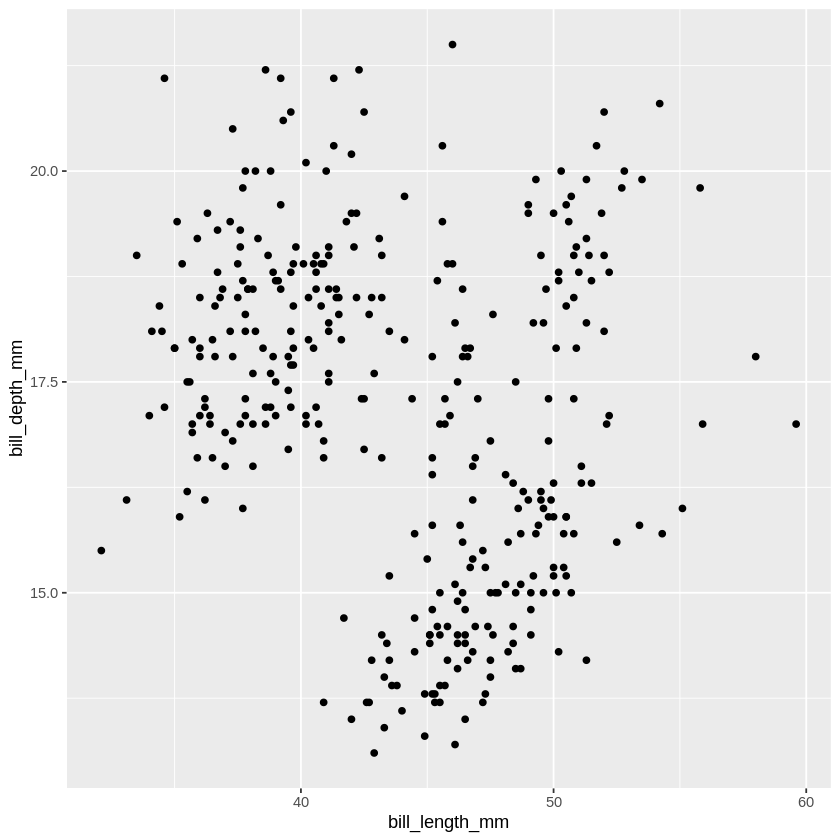

In [10]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point()

There is some clustering shown in the graph and in each cluster, as bill length increases, so does bill depth.

4. What happens if you make a scatterplot of species vs. bill_depth_mm? What might be a better choice of geom?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


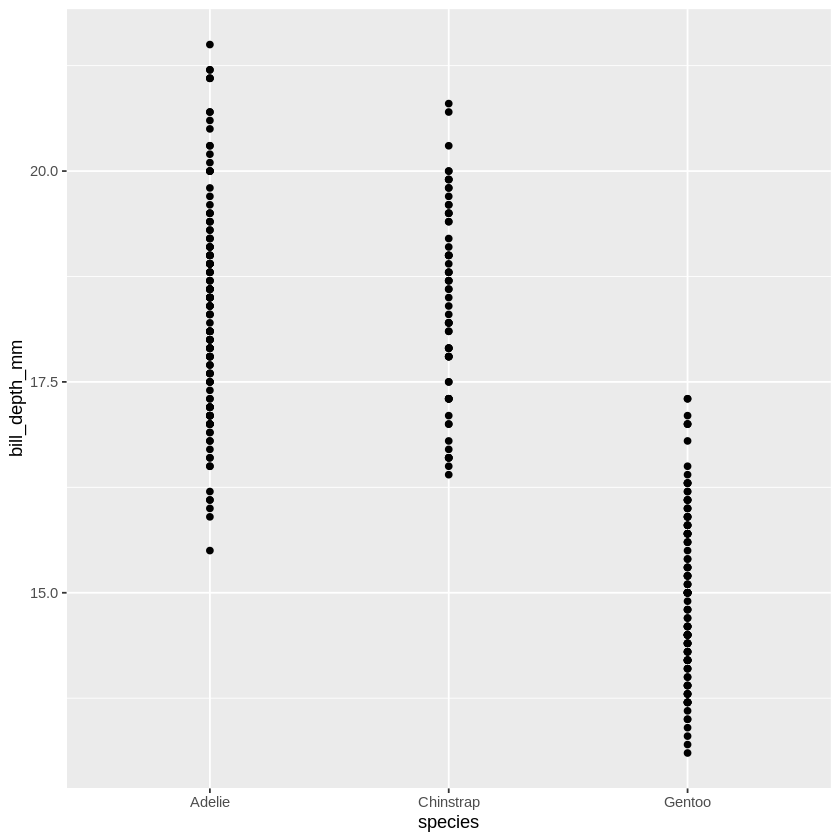

In [11]:
ggplot(
  data = penguins, mapping = aes(x = species, y = bill_depth_mm)) + 
  geom_point()

All points are on the species line on the x-axis. A better geom would be geom_boxplot().

5. Why does the following give an error and how would you fix it?
```r
ggplot(data = penguins) +   
  geom_point()
```

You don't know what the x and y axies are. You can fix this by adding mapping = aes() with whatever you to be x and y in the parentheses.

6. What does the na.rm argument do in geom_point()? What is the default value of the argument? Create a scatterplot where you successfully use this argument set to TRUE.

na.rm removes all missing values. The defualt of the argument is false.

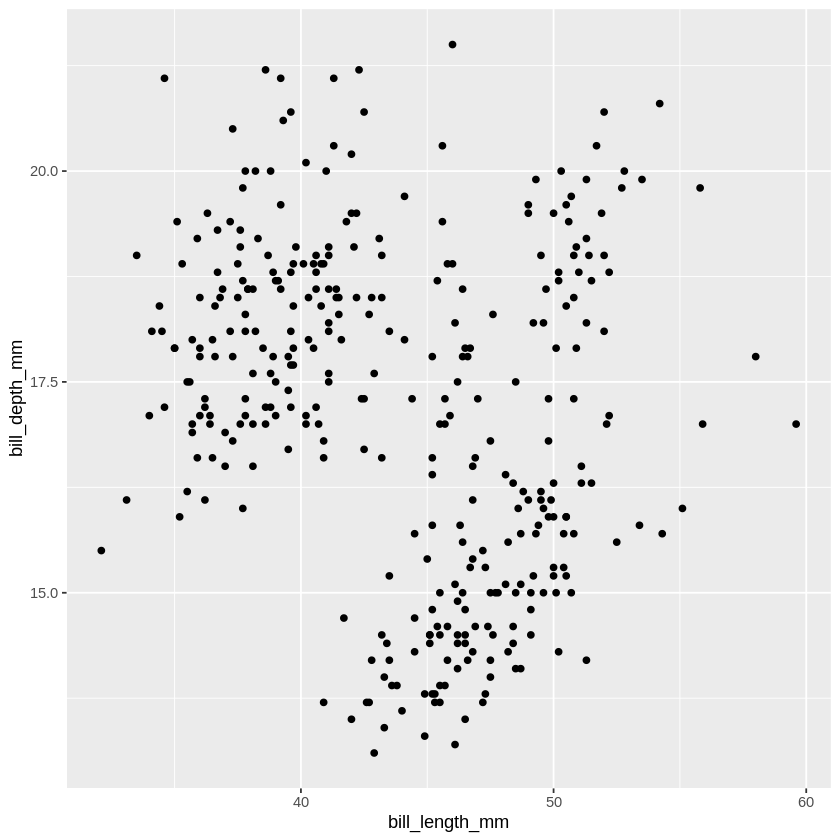

In [5]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point(na.rm= TRUE)

7. Add the following caption to the plot you made in the previous exercise: “Data come from the palmerpenguins package.” Hint: Take a look at the documentation for labs().

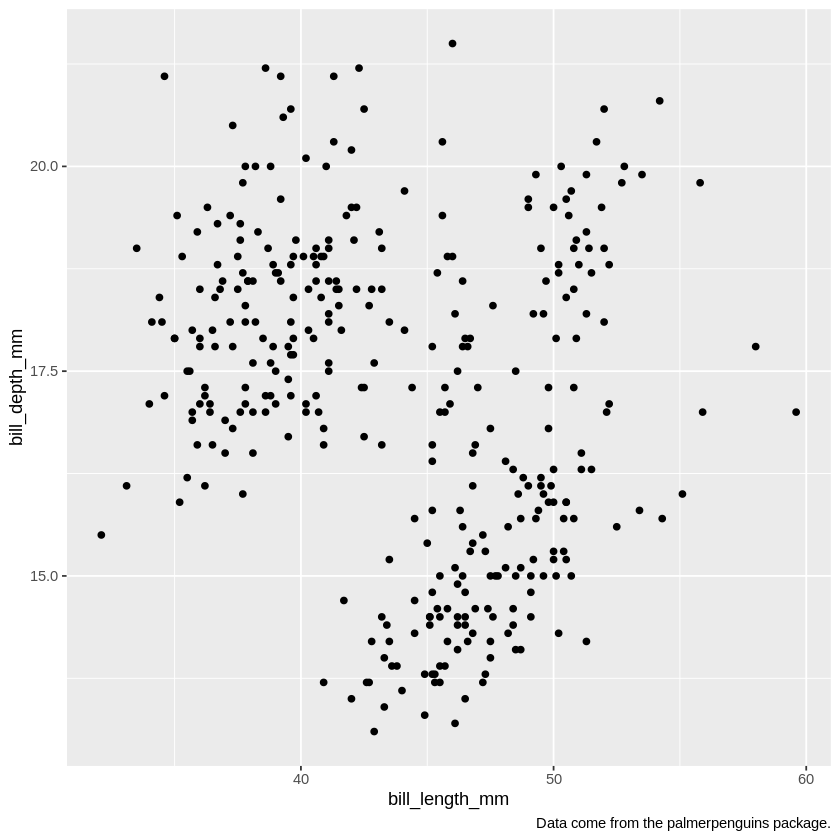

In [5]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point(na.rm = TRUE) + 
  labs(caption = "Data come from the palmerpenguins package.")

8. Recreate the following visualization. What aesthetic should bill_depth_mm be mapped to? And should it be mapped at the global level or at the geom level?  
<img src="https://r4ds.hadley.nz/data-visualize_files/figure-html/unnamed-chunk-17-1.png" width="400" height="300" />

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


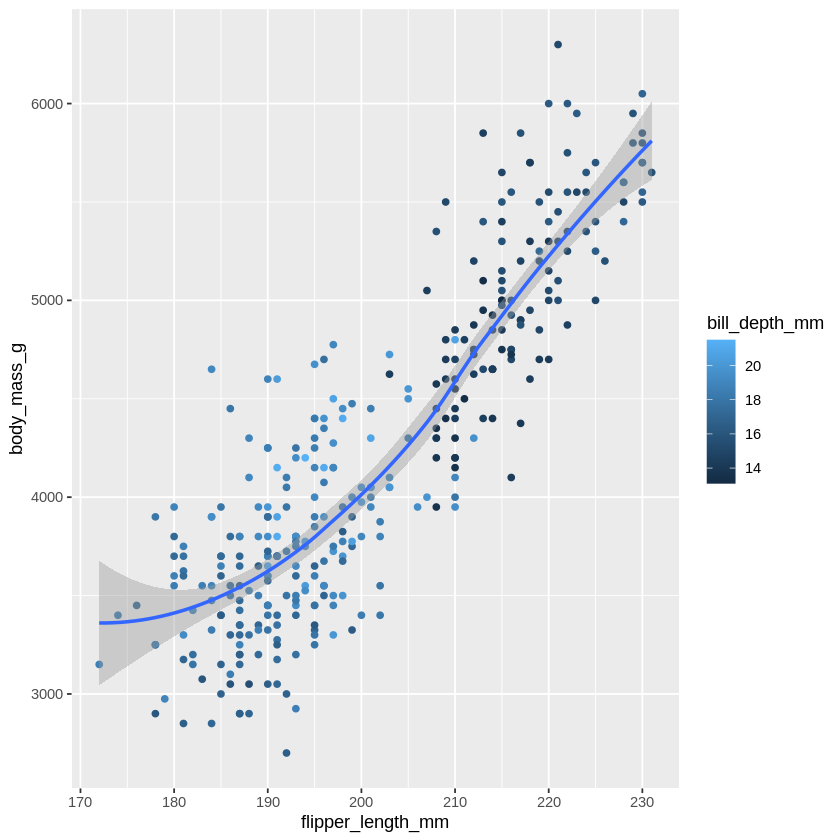

In [17]:
ggplot(
    data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g, color = bill_depth_mm)) +
    geom_point(na.rm = TRUE) + 
    geom_smooth()

9. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.
```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)
```

It will be a scatterplot with a line displaying the relationship between flipper length and body mass for each island.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


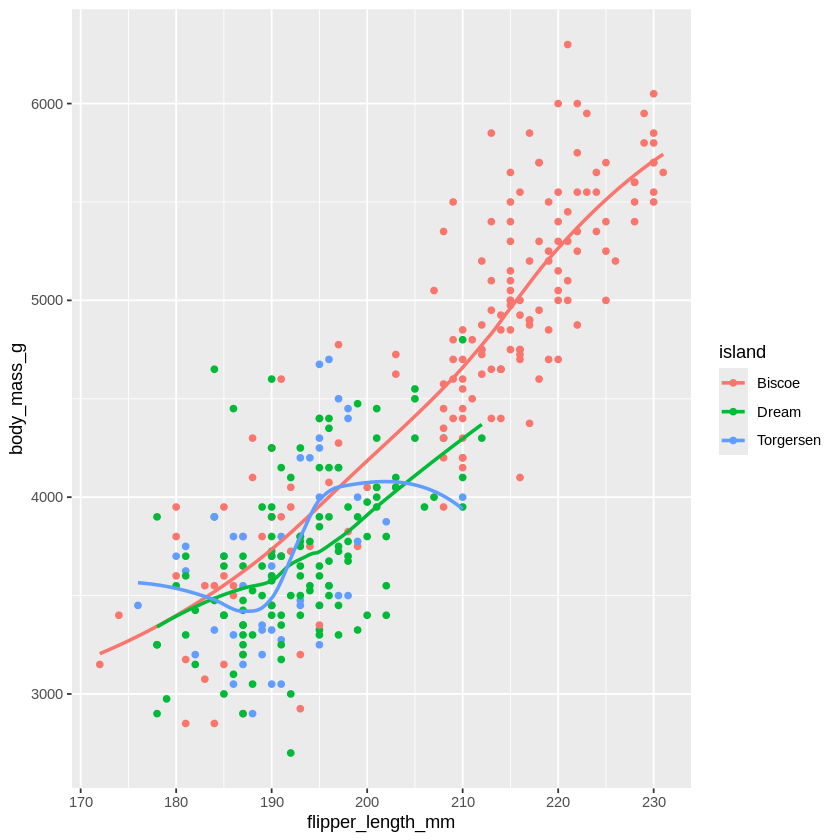

In [18]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)

My predictions were correct.

10. Will these two graphs look different? Why/why not?

```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  ) +
  geom_smooth(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  )
  ```

They will look the same because in the second one, while the mapping is in the geom, they are the same, so it is no different than just having the mapping in the ggplot.